<a href="https://colab.research.google.com/github/VincenzoLuna/Trabajo-final---Python-2---Grupo-2/blob/main/Trabajo_2_Grupo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import numpy as np
cancer = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase5/breast-cancer.csv')
cancer_df = cancer.drop(cancer.columns[[0,1,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31]], axis = 'columns')
display(cancer_df.tail(30))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.092520,0.013640,0.2037,0.07751,8.678
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,0.06782,12.260
541,14.470,24.99,95.81,656.4,0.08837,0.12300,0.100900,0.038900,0.1872,0.06341,16.220
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.030270,0.1840,0.05680,16.510
543,13.210,28.06,84.88,538.4,0.08671,0.06877,0.029870,0.032750,0.1628,0.05781,14.370
544,13.870,20.70,89.77,584.8,0.09578,0.10180,0.036880,0.023690,0.1620,0.06688,15.050
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.029740,0.024430,0.1664,0.05801,15.350
546,10.320,16.35,65.31,324.9,0.09434,0.04994,0.010120,0.005495,0.1885,0.06201,11.250
547,10.260,16.58,65.85,320.8,0.08877,0.08066,0.043580,0.024380,0.1669,0.06714,10.830
548,9.683,19.34,61.05,285.7,0.08491,0.05030,0.023370,0.009615,0.1580,0.06235,10.930


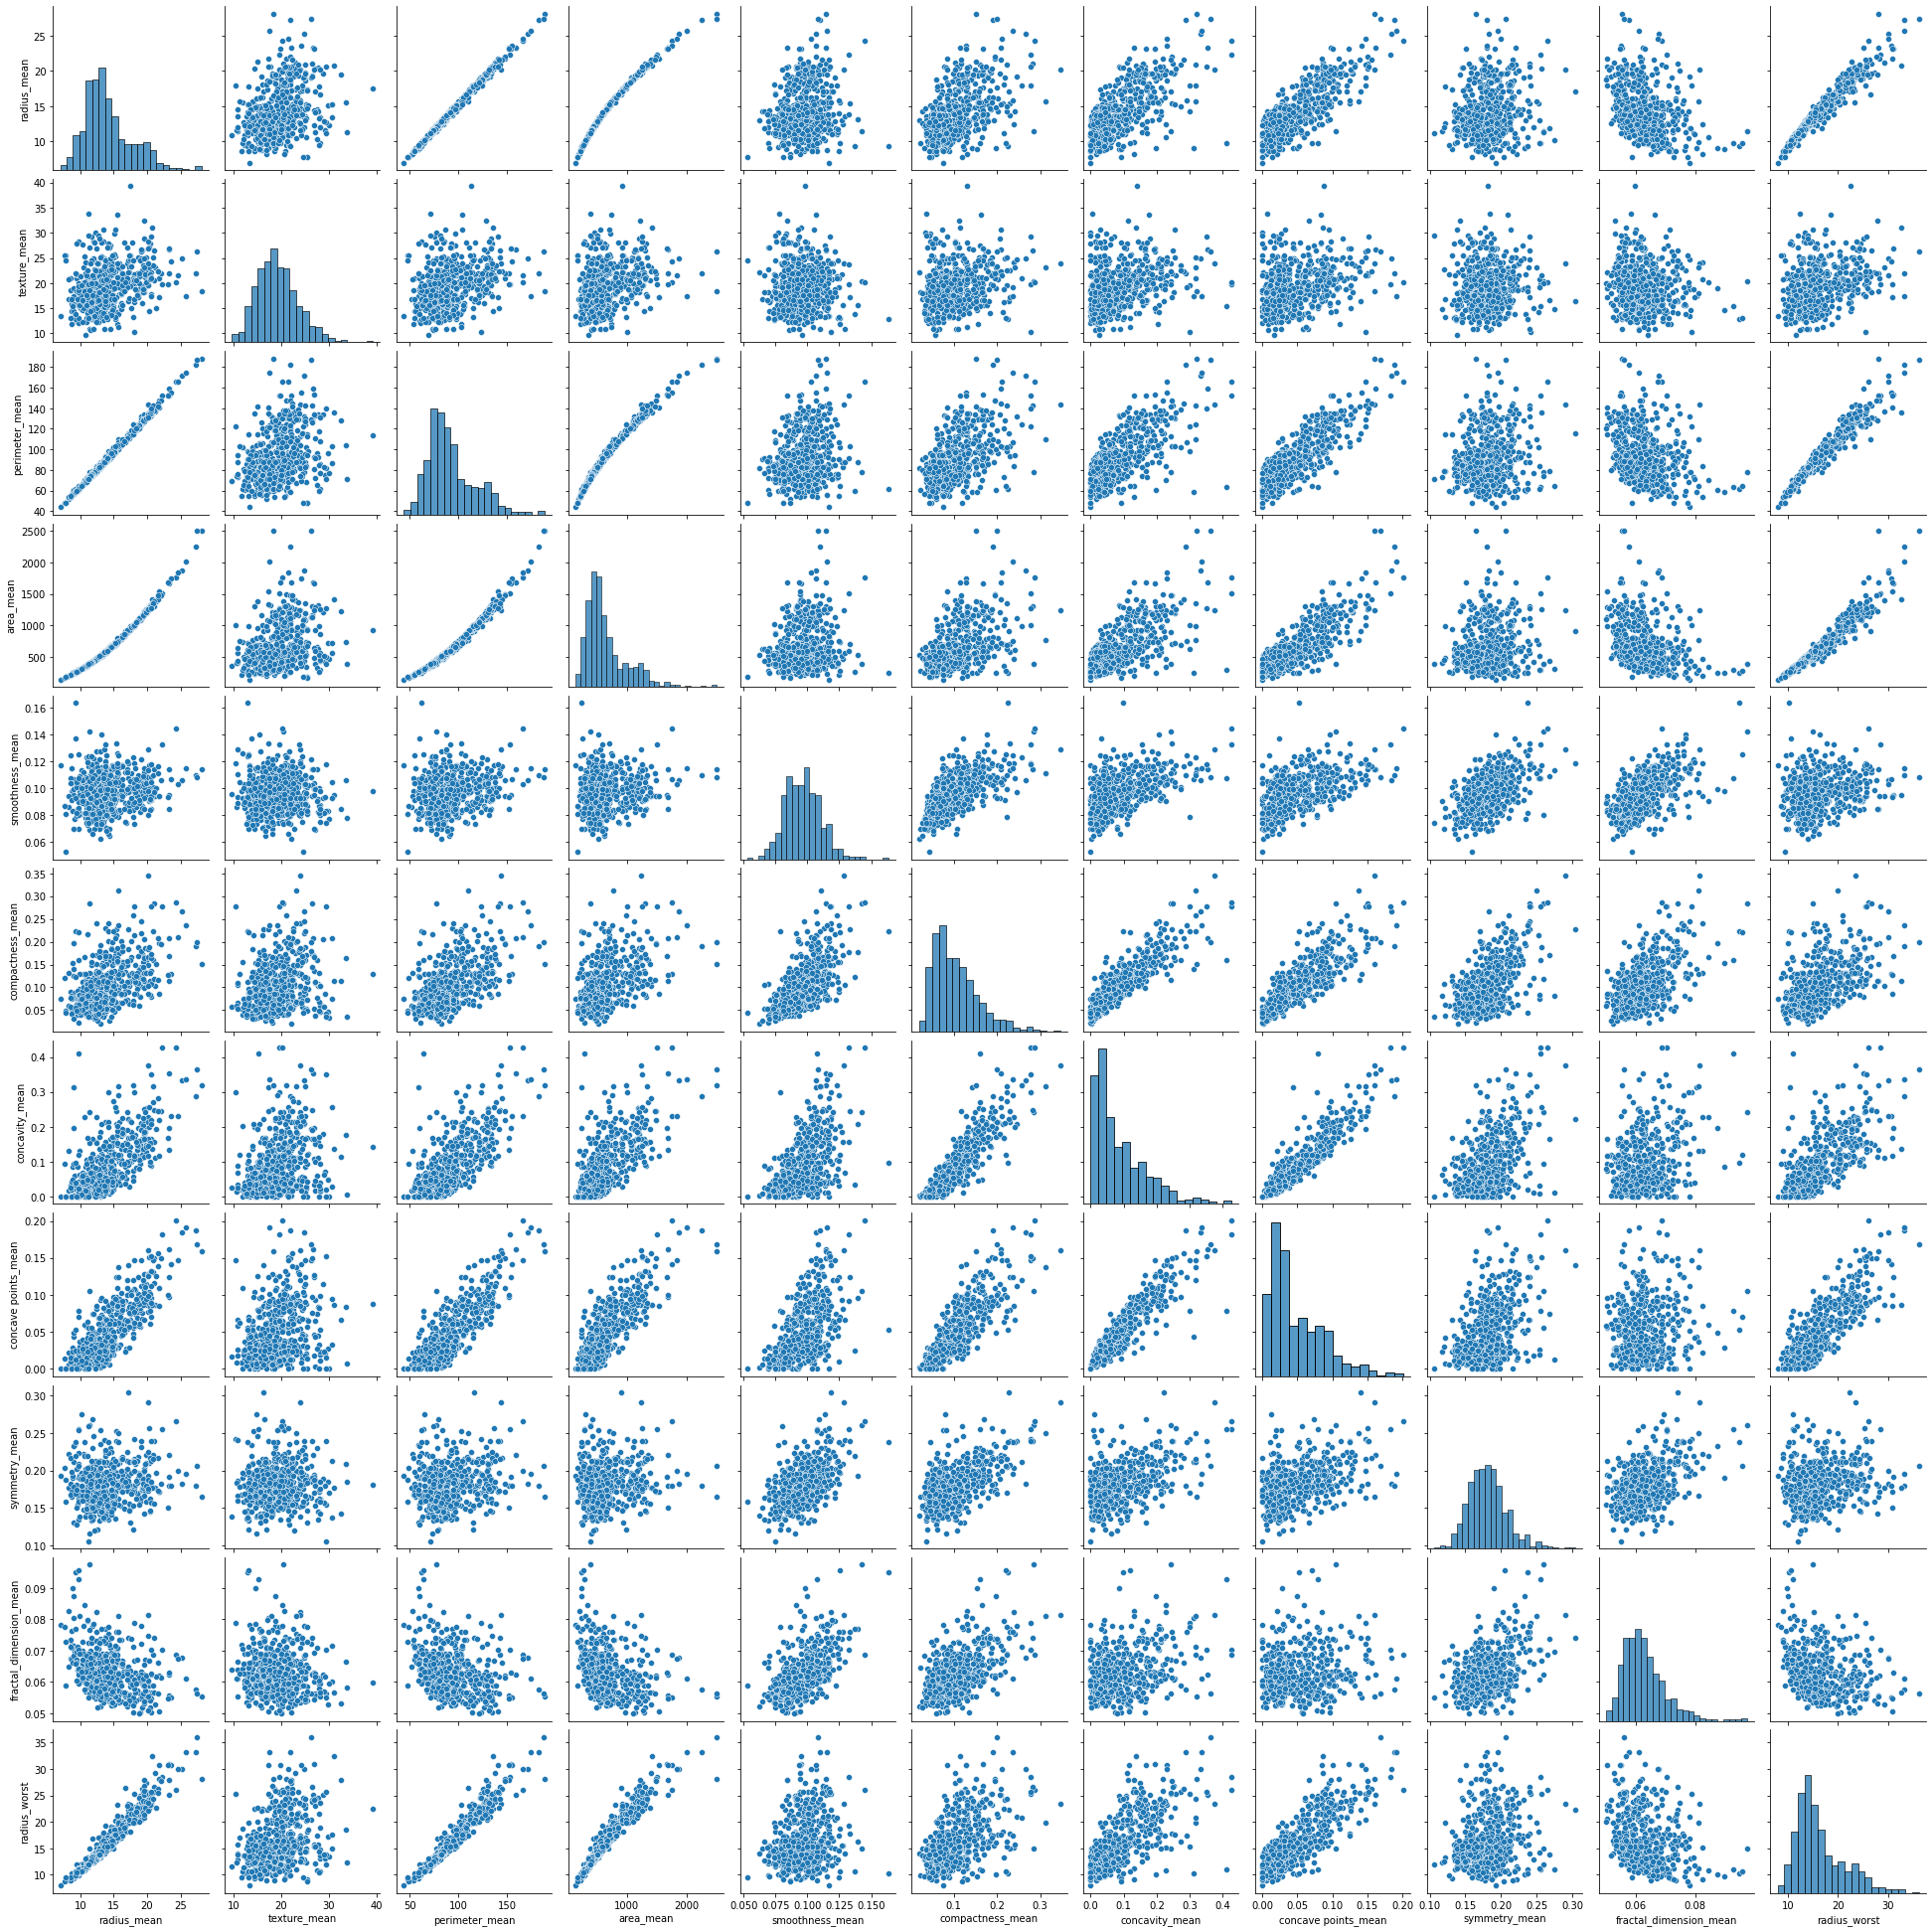

In [2]:
import seaborn as sns 
sns.pairplot(cancer_df)

In [3]:
from sklearn.linear_model import LinearRegression
def calcular_vif (df, características):     
    vif, tolerancia = {}, {}
    # todas las características que desea examinar 
    for característica in características: 
        # extraiga todas las demás características con las que retrocederá 
        X = [f for f in características if f != característica]         
        X, y = df[X], df[característica]
        # extraer r-cuadrado del ajuste 
        r2 = LinearRegression().fit(X, y).score(X, y)                 
        
        # calcular tolerancia 
        tolerancia[característica] = 1 - r2
        # calcular VIF 
        vif[característica] = 1/(tolerancia[característica])
    # devuelve VIF DataFrame 
    return pd.DataFrame({'VIF': vif, 'Tolerancia': tolerancia})

In [4]:
calcular_vif(df= cancer_df,características = (#'radius_mean',
                                              'texture_mean',
                                              #'perimeter_mean',
                                              'area_mean',
                                              'smoothness_mean',
                                              #'compactness_mean',
                                              'concavity_mean',
                                              #'concave points_mean',
                                              'symmetry_mean',
                                              'fractal_dimension_mean'))

,VIF,Tolerancia
texture_mean,1.173247,0.852336
area_mean,4.471599,0.223634
smoothness_mean,2.098786,0.476466
concavity_mean,4.921308,0.203198
symmetry_mean,1.686023,0.593112
fractal_dimension_mean,3.311538,0.301974


In [5]:
X = cancer_df.drop(columns= ['radius_mean','perimeter_mean','compactness_mean','concave points_mean','radius_worst'])
y = cancer_df['radius_worst']
display(X.head())

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883


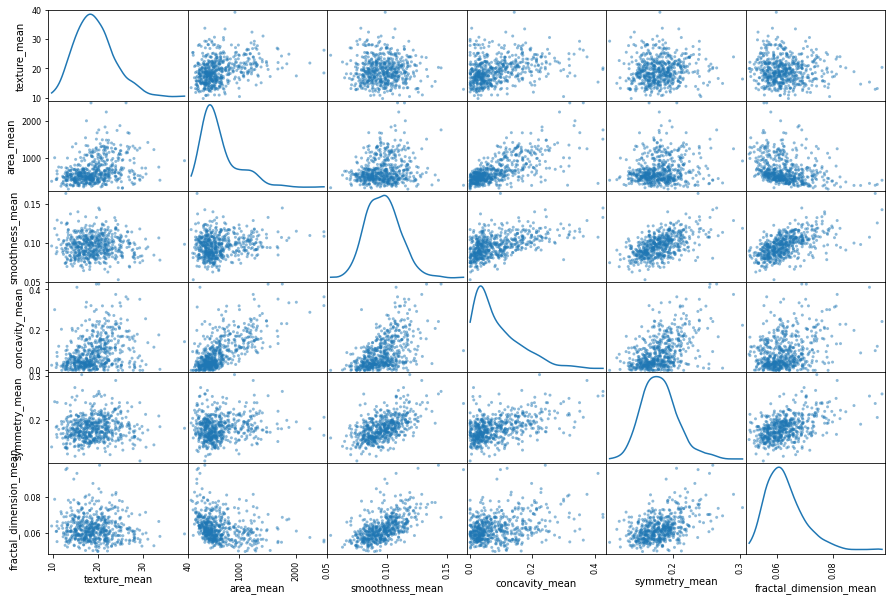

In [83]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(X,figsize = (15,10) , diagonal = 'kde')
plt.show()

##Estandarizar

In [ ]:
from sklearn.preprocessing import StandardScaler as SS

X_array = np.array(X)
x = X_array[:,1]
x1 = X_array[:,3]
x = np.reshape(x,(len(x),1))
x1 = np.reshape(x1,(len(x1),1))


X_stand = []
for i in [x,x1]:
  standard = SS().fit(i)
  X_1 = standard.transform(i)
  X_stand.append(X_1)

print(X_stand[0])

##Escalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler as MMS

x_stand = X_stand[0]
x_stand_1 = X_stand[1]
x2 = x = X_array[:,0]
x2 = np.reshape(x2,(len(x2),1))

X_scaler = []
for j in [x_stand,x_stand_1,x2]:
  scaler = MMS(feature_range = (0,1))
  x_scaler = scaler.fit_transform(j)
  X_scaler.append(x_scaler)

print(X_scaler[0])

##Nuevo dataframe

In [8]:
X_final = X.drop(columns = ['texture_mean','area_mean','concavity_mean'])
X_final['texture_mean']= X_scaler[2]
X_final['area_mean']= X_scaler[0]
X_final['concavity_mean']= X_scaler[1]
display(X_final)

,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_mean,area_mean,concavity_mean
0,0.11840,0.2419,0.07871,0.022658,0.363733,0.703140
1,0.08474,0.1812,0.05667,0.272574,0.501591,0.203608
2,0.10960,0.2069,0.05999,0.390260,0.449417,0.462512
3,0.14250,0.2597,0.09744,0.360839,0.102906,0.565604
4,0.10030,0.1809,0.05883,0.156578,0.489290,0.463918
...,...,...,...,...,...,...
564,0.11100,0.1726,0.05623,0.428813,0.566490,0.571462
565,0.09780,0.1752,0.05533,0.626987,0.474019,0.337395
566,0.08455,0.1590,0.05648,0.621238,0.303118,0.216753
567,0.11780,0.2397,0.07016,0.663510,0.475716,0.823336


##Modelo de Regresión

In [9]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as SGDR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
X_2 = np.array(X_final)
y_2 = np.array(y)
y_2 = np.reshape(y_2,(len(y_2),1))
print(np.shape(y_2))

(569, 1)


In [133]:
X_2train,X_2test,y_2train,y_2test = tts(X_2,y_2,test_size = 0.2, random_state = 42)

In [134]:
modeloRFR = RFR(random_state = 42, n_estimators= 100)
modeloSGDR = SGDR(random_state = 42, n_estimators= 100)

In [135]:
r2_score_train = []
r2_score_test = []
gen_percent = []
for k in [modeloRFR,modeloSGDR]:
  k.fit(X_2train,y_2train)
  ypredtrain = k.predict(X_2train)
  ypredtest = k.predict(X_2test)

  r2scoretrain = r2_score(y_2train,ypredtrain)
  r2_score_train.append(r2scoretrain)

  r2scoretest= r2_score(y_2test,ypredtest)
  r2_score_test.append(r2scoretest)

  gen = ((r2scoretrain-r2scoretest)/r2scoretrain)*100
  gen_percent.append(gen)

dicc = {'Modelo':['Random Forest Regressor','Gradient Boosting Regressor']}
dicc_df = pd.DataFrame(dicc)
dicc_df['r2 score train'] = r2_score_train
dicc_df['r2 score test'] = r2_score_test
dicc_df['%gen'] = gen_percent
display(dicc_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Modelo,r2 score train,r2 score test,%gen
0,Random Forest Regressor,0.991558,0.953269,3.861442
1,Gradient Boosting Regressor,0.987127,0.962436,2.501295


##Modelo de Regresión con PCA

In [136]:
modeloRFR2 = RFR(random_state = 42)
modeloSGDR2 = SGDR(random_state = 42)

In [137]:
from sklearn.decomposition import PCA

r2_score_train_pca = []
r2_score_test_pca = []
gen_percent_pca= []

pca1 = PCA(n_components = 5)
pca1.fit(X_2)
Xpca = pca1.transform(X_2)

Xpcatrain,Xpcatest,y_2train,y_2test = tts(Xpca,y_2,test_size = 0.2,random_state = 42)

for m in [modeloRFR2,modeloSGDR2]:
  m.fit(Xpcatrain,y_2train)
  ypredtrain_pca = m.predict(Xpcatrain)
  ypredtest_pca = m.predict(Xpcatest)

  r2scoretrainpca = r2_score(y_2train,ypredtrain_pca)
  r2_score_train_pca.append(r2scoretrainpca)

  r2scoretestpca= r2_score(y_2test,ypredtest_pca)
  r2_score_test_pca.append(r2scoretestpca)

  gen_pca = ((r2scoretrainpca-r2scoretestpca)/r2scoretrainpca)*100
  gen_percent_pca.append(gen_pca)

dicc_1 = {'Modelo':['Random Forest Regressor PCA','Gradient Boosting Regressor PCA']}
dicc_1_df = pd.DataFrame(dicc_1)
dicc_1_df['r2 score train'] = r2_score_train_pca
dicc_1_df['r2 score test'] = r2_score_test_pca
dicc_1_df['%gen'] = gen_percent_pca
display(dicc_1_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Modelo,r2 score train,r2 score test,%gen
0,Random Forest Regressor PCA,0.988566,0.937708,5.144665
1,Gradient Boosting Regressor PCA,0.984614,0.946274,3.893899


In [138]:
radio_list = []
def predicción():
  texture_mean = float(input('Ingresa el valor del texture mean: '))
  smoothness_mean = float(input('Ingresa el valor del smoothness mean: '))
  area_mean = float(input('Ingresa el valor del area mean: '))
  concavity_mean = float(input('Ingresa el valor del concavity mean: '))
  symetry_mean = float(input('Ingresa el valor del symetry mean: '))
  fractal_dimension_mean = float(input('Ingresa el valor del fractal dimension mean: '))

  for j in [modeloRFR,modeloSGDR]:
    global radio
    radio = j.predict([[texture_mean,area_mean,smoothness_mean,concavity_mean,symetry_mean,fractal_dimension_mean]])
    radio_list.append(radio)
    
  predicciones_dicc = {'Modelos':['Random Forest Regressor','Gradient Boosting Regressor'],'Radius worst':[radio_list[0][0],radio_list[1][0]]}
  predicciones_df = pd.DataFrame(predicciones_dicc)
  return(predicciones_df)

In [143]:
predicción()

Ingresa el valor del texture mean: 25.42
Ingresa el valor del smoothness mean: 0.08275
Ingresa el valor del area mean: 668.6
Ingresa el valor del concavity mean: 0.041050
Ingresa el valor del symetry mean: 0.1840
Ingresa el valor del fractal dimension mean: 0.05680


,Modelos,Radius worst
0,Random Forest Regressor,15.329600
1,Gradient Boosting Regressor,16.310017
